# Proyek Analisis Data: Bike Data Sharing
- **Nama:** Risdasih Agustin
- **Email:** risdasihhh@gmail.com
- **ID Dicoding:** risdasih_agustin

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana faktor musiman dan cuaca mempengaruhi jumlah sepeda yang disewa?
- Pertanyaan 2: Apa hubungan antara hari dalam seminggu dan jumlah sepeda yang disewa?

## Import Semua Packages/Library yang Digunakan

In [1]:
#  Mengimpor semua packages yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap data wrangling, langkah pertama yang harus dilakukan adalah mengunduh data yang akan digunakan. Setelah itu, data dibuka atau dibaca ke dalam program agar bisa dilihat dan diproses lebih lanjut.

In [2]:
# Mengambil data dari akun Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"risdasihagustin","key":"7f59a051ab7bbca532af30c170fee9eb"}'}

In [3]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Mengunduh data yang digunakan
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
100% 286k/286k [00:00<00:00, 846kB/s]
100% 286k/286k [00:00<00:00, 845kB/s]


In [5]:
# Ekstrak data
import zipfile
with zipfile.ZipFile("bike-sharing-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("bike_sharing_data")

In [6]:
# Baca data day.csv
bike_data_day = pd.read_csv("bike_sharing_data/day.csv")
bike_data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Baca data hour.csv
bike_data_hour = pd.read_csv("bike_sharing_data/hour.csv")
bike_data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap assessing data, langkah-langkah yang dilakukan meliputi:

* Mengecek jenis data di setiap kolom untuk memastikan data sudah sesuai dengan
tipe yang seharusnya
* Memeriksa apakah ada data yang terduplikasi agar tidak ada data yang berulang
* Melihat deskripsi statistik data untuk memahami sebaran dan informasi penting lainnya dari data.

In [8]:
# Mengecek jenis data day.csv
bike_data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# Mengecek jenis data hour.csv
bike_data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil pengecekan pada jenis data di file **day.csv** dan **hour.csv**, ditemukan bahwa tipe data pada kolom **'dteday'** tidak sesuai. Kolom tersebut bertipe **'object'**, padahal seharusnya bertipe **'datetime'**.

In [10]:
# Memeriksa jumlah duplikasi dari data day.csv
print("Jumlah duplikasi: ", bike_data_day.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Mengecek jumlah duplikasi dari data hour.csv
print("Jumlah duplikasi: ", bike_data_hour.duplicated().sum())

Jumlah duplikasi:  0


Setelah dilakukan pemeriksaan terhadap data duplikat pada dataset **day.csv** dan **hour.csv**, tidak ditemukan adanya duplikasi data. Hal ini ditunjukkan oleh jumlah data duplikat yang tercatat sebanyak 0.

In [12]:
# Deskripsi statistik data day.csv
bike_data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
# Deskripsi statistik data hour.csv
bike_data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil yang ditampilkan, tidak ada kesalahan atau hal yang aneh dalam data. Semua nilai terlihat normal dan sesuai dengan yang diharapkan.

### Cleaning Data

Pada tahap cleaning data, salah satu langkah yang dilakukan adalah mengubah tipe data pada kolom **'dteday'** dari **'object'** menjadi **'datetime'** agar data tersebut lebih mudah diolah dan dianalisis.

In [14]:
# Mengubah kolom 'dteday' menjadi 'datetime' pada data day.csv
datetime_columns_day = ["dteday"]

for column in datetime_columns_day:
  bike_data_day[column] = pd.to_datetime(bike_data_day[column])

In [15]:
# Mengubah kolom 'dteday' menjadi 'datetime' pada data hour.csv
datetime_columns_hour = ["dteday"]

for column in datetime_columns_hour:
  bike_data_hour[column] = pd.to_datetime(bike_data_hour[column])

In [16]:
bike_data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
bike_data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dari informasi di atas, dapat dilihat bahwa pada masing-masing dataset **day.csv** dan **hour.csv**, tipe data untuk kolom **'dteday'** sudah sesuai dan telah diubah menjadi **'datetime'**.

## Exploratory Data Analysis (EDA)

### Total jumlah penyewaan sepeda berdasarkan musim (season) dan cuaca (weathersit)

In [18]:
grouped_day = bike_data_day.groupby(by=["season", "weathersit"]).agg({
    "instant": "nunique",   # Menghitung jumlah unik 'instant'
    "cnt": "sum",           # Menghitung total jumlah sewa sepeda
    "temp": ["min", "max"]  # Menghitung suhu minimum dan maksimum
}).reset_index()

In [20]:
# Flatten kolom multi-level setelah agregasi
grouped_day.columns = ['_'.join(col).strip() for col in grouped_day.columns.values]

# Reset index untuk membuat data lebih mudah diproses
grouped_day = grouped_day.reset_index()

In [21]:
grouped_day.head()

,index,season_,weathersit_,instant_nunique,cnt_sum,temp_min,temp_max
0,0,1,1,111,312036,0.059130,0.572500
1,1,1,2,66,155573,0.107500,0.514167
2,2,1,3,4,3739,0.217500,0.389091
3,3,2,1,113,626986,0.264167,0.782500
4,4,2,2,68,288096,0.253043,0.808333


### Total jumlah penyewaan sepeda berdasarkan hari dalam seminggu (weekday)

In [26]:
grouped_hour = bike_data_hour.groupby(by=["weekday"]).agg({
    "instant": "nunique",    # Menghitung jumlah unik 'instant'
    "cnt": "sum",            # Menghitung total jumlah sewa sepeda
    "windspeed": "mean"      # Menghitung rata-rata kecepatan angin
}).reset_index()

In [27]:
# Flatten kolom multi-level setelah agregasi
grouped_hour.columns = ['_'.join(col).strip() for col in grouped_hour.columns.values]

# Reset index untuk membuat data lebih mudah diproses
grouped_hour = grouped_hour.reset_index()

In [28]:
grouped_hour.head()

,index,w_e_e_k_d_a_y,i_n_s_t_a_n_t,c_n_t,w_i_n_d_s_p_e_e_d
0,0,0,2502,444027,0.188093
1,1,1,2479,455503,0.188863
2,2,2,2453,469109,0.191917
3,3,3,2475,473048,0.187172
4,4,4,2471,485395,0.191987


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana faktor musiman dan cuaca mempengaruhi jumlah sepeda yang disewa?

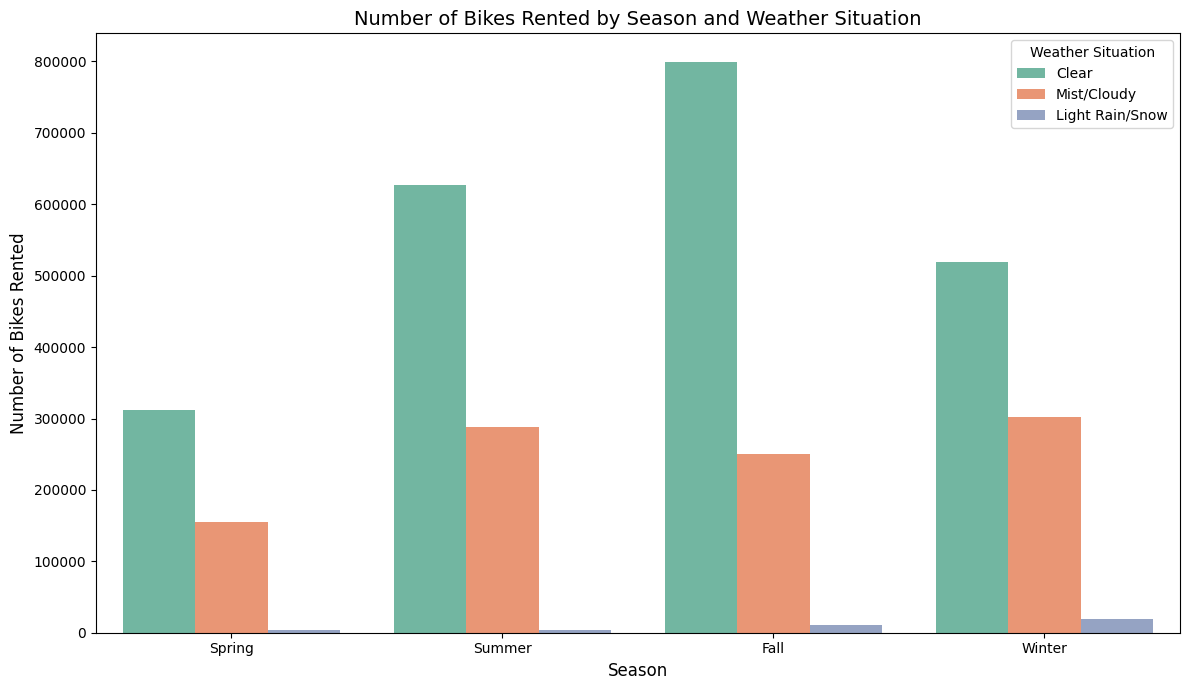

In [24]:
# Menyiapkan figure dan ukuran
plt.figure(figsize=(12, 7))

# Membuat barplot dengan tambahan hue untuk 'weathersit'
sns.barplot(x='season_', y='cnt_sum', hue='weathersit_', data=grouped_day, palette='Set2')

# Menambahkan judul dan label
plt.title('Number of Bikes Rented by Season and Weather Situation', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Bikes Rented', fontsize=12)

# Menyesuaikan label sumbu X dengan nama musim dalam bahasa Inggris
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)

# Mengatur label legend dengan menggunakan legend handles dan labels
handles, labels = plt.gca().get_legend_handles_labels()

# Mengatur ulang label menjadi sesuai dengan yang diinginkan
new_labels = ['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow']

# Menampilkan legend dengan label yang disesuaikan
plt.legend(handles=handles, labels=new_labels, title='Weather Situation', loc='upper right')

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak ada yang terpotong
plt.show()

Dari hasil visualisasi tersebut, **Musim Gugur (Fall)** dan **Musim Panas (Summer)** mencatat jumlah penyewaan sepeda tertinggi dibandingkan musim lainnya, terutama saat cuaca cerah. Sedangkan **Musim Semi (Spring)** dan **Musim Dingin (Winter)** menunjukkan penyewaan sepeda yang lebih rendah dibandingkan **Fall** dan **Summer**.

### Pertanyaan 2: Apa hubungan antara hari dalam seminggu (weekday) dan jumlah sepeda yang disewa?

<ipython-input-25-fec6e7c3bdb5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='w_e_e_k_d_a_y', y='c_n_t', data=grouped_hour, palette='Set2')


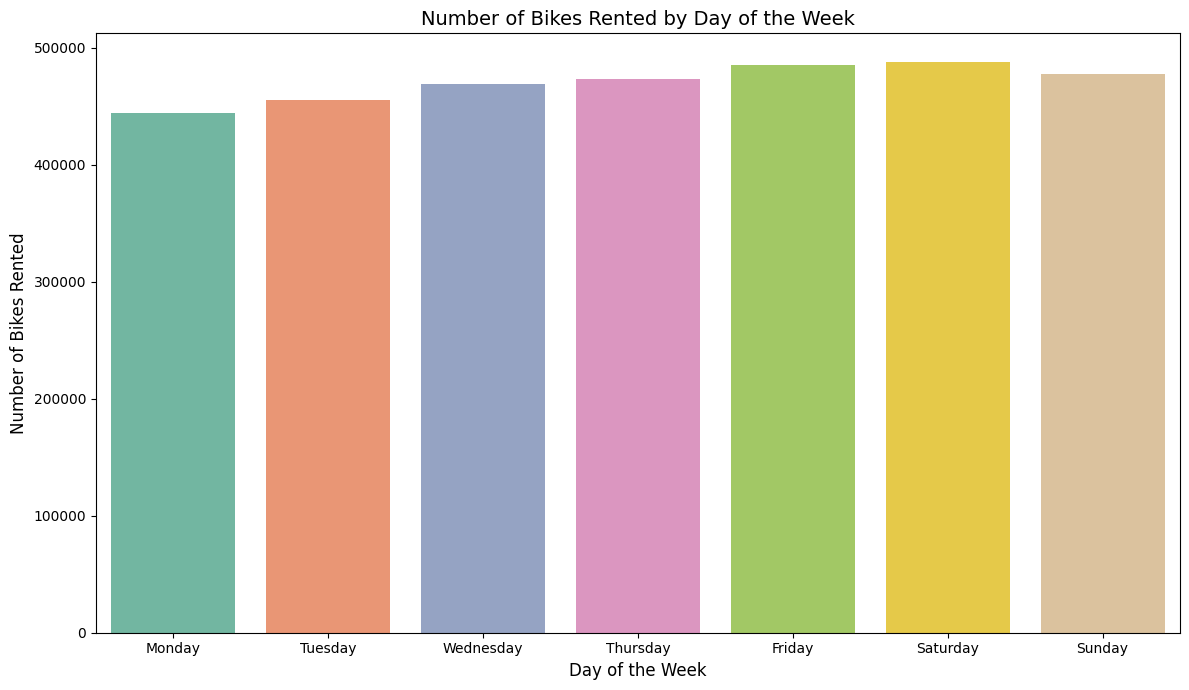

In [25]:
# Menyiapkan figure dan ukuran
plt.figure(figsize=(12, 7))

# Membuat barplot dengan tambahan hue untuk 'weekday'
sns.barplot(x='w_e_e_k_d_a_y', y='c_n_t', data=grouped_hour, palette='Set2')

# Menambahkan judul dan label
plt.title('Number of Bikes Rented by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Bikes Rented', fontsize=12)

# Menyesuaikan label sumbu X dengan nama hari dalam bahasa Inggris
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak ada yang terpotong
plt.show()


Berdasarkan hasil visualisasi di atas, bahwa jumlah sepeda yang disewa relatif **merata sepanjang minggu**, tanpa fluktuasi yang signifikan antara hari kerja (Senin hingga Jumat) dan akhir pekan (Sabtu dan Minggu). Namun, jika diperhatikan lebih detail lagi terdapat sedikit peningkatan jumlah penyewaan sepeda pada hari Sabtu dan Minggu dibandingkan dengan hari kerja.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan gambar di atas, faktor musiman menunjukkan bahwa **Musim Gugur (Fall)** dan **Musim Panas (Summer)** adalah musim yang paling mendukung untuk penyewaan sepeda. Faktor cuaca menunjukkan bahwa cuaca **cerah (clear)** sangat meningkatkan aktivitas penyewaan sepeda, sementara cuaca buruk seperti **kabut/berawan (mist/cloudy)** atau **hujan ringan/salju (light rain/snow)** cenderung menghambatnya.
- Conclution pertanyaan 2: **Hari dalam seminggu (weekday)** tidak secara signifikan memengaruhi jumlah penyewaan sepeda, meskipun terdapat sedikit kecenderungan peningkatan pada akhir pekan, kemungkinan karena aktivitas rekreasi.

In [29]:
grouped_day.to_csv("day_df.csv", index=False)

In [30]:
grouped_hour.to_csv("hour_df.csv", index=False)